In [2]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.model_selection import train_test_split        # train-test split
from sklearn.metrics import confusion_matrix, roc_auc_score # results analysis
from sklearn.cluster import KMeans                          # k-means clustering
import sklearn.linear_model   

# packages for unsupervised learning
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
facebook_data = pd.read_excel(io = './facebook_live_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

# standard_scaler
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

# Introduction

This project is a machine learning model that can classify and analyze the content present on social media platforms. As digital platforms are growing at an exponential rate, it is becoming increasingly important for us to comprehend and utilize the potential of user-generated content. To achieve this, we will develop a model for classifying content into relevant categories, such as images, text, and videos, which will help us personalize and target future campaigns.
Our primary focus will be on data collection, processing, and analysis, along with implementing machine learning algorithms for content classification and segmentation. 



In [4]:
facebook_data.head()

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0


In [5]:
# checking information about each column
facebook_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


Checking descriptive statistics

In [6]:
# descriptive statistics about each numeric column
facebook_data.describe(include = 'number').round(decimals = 2)

,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,1181.50,233.73,39.82,221.15,12.83,1.28,0.74,0.26,0.12
std,681.99,856.36,123.78,467.31,41.00,8.72,4.11,1.84,0.90
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,591.25,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00
50%,1181.50,4.00,0.00,57.00,0.00,0.00,0.00,0.00,0.00
75%,1771.75,23.00,3.00,186.00,3.00,0.00,0.00,0.00,0.00
max,2362.00,10960.00,1260.00,4315.00,421.00,278.00,102.00,46.00,31.00


New variable engagement

In [79]:
# calculate an engagement variable
facebook_data['engagement'] = facebook_data['num_comments'] + facebook_data['num_shares'] + facebook_data['num_likes'] + facebook_data['num_loves'] + facebook_data['num_wows'] + facebook_data['num_hahas'] + facebook_data['num_sads'] + facebook_data['num_angrys']

# calculate the total engagement for each type of content
engagement_by_type = facebook_data.groupby('status_type')['engagement'].sum()

# Print the result
print("\nTotal engagement by content type:", engagement_by_type)

# Find the content type with the highest engagement
max_engagement_type = engagement_by_type.idxmax()
max_engagement_total = engagement_by_type.max()

# Print the result
print("\nThe content type with the highest engagement is:", max_engagement_type)
print("Total engagement for this content type:", max_engagement_total)

# Analyze which types of reactions contribute most to engagement
max_engagement_data = facebook_data[facebook_data['status_type'] == max_engagement_type]
total_reactions = max_engagement_data[['num_comments','num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()
print("\nTotal reactions for the content type with highest engagement:")
print(total_reactions)



Total engagement by content type: status_type
photo    292838
text      79718
video    831905
Name: engagement, dtype: int64

The content type with the highest engagement is: video
Total engagement for this content type: 831905

Total reactions for the content type with highest engagement:
num_comments    514376
num_shares       89158
num_likes       196253
num_loves        28100
num_wows          1912
num_hahas         1560
num_sads           336
num_angrys         210
dtype: int64


In [80]:
# Filter the DataFrame to get only the rows where the content type is "photo"
photo_data = facebook_data[facebook_data['status_type'] == 'photo']

# Calculate the total reactions for photo content
reactions_photo = photo_data[['num_comments','num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Sort the reactions_photo DataFrame in ascending order by the total sum of reactions
reactions_photo_sorted = reactions_photo.sort_values(ascending=False)

# Show the result
print(reactions_photo_sorted)


num_likes       253180
num_comments     31796
num_shares        4385
num_loves         2009
num_wows           983
num_sads           239
num_hahas          168
num_angrys          78
dtype: int64


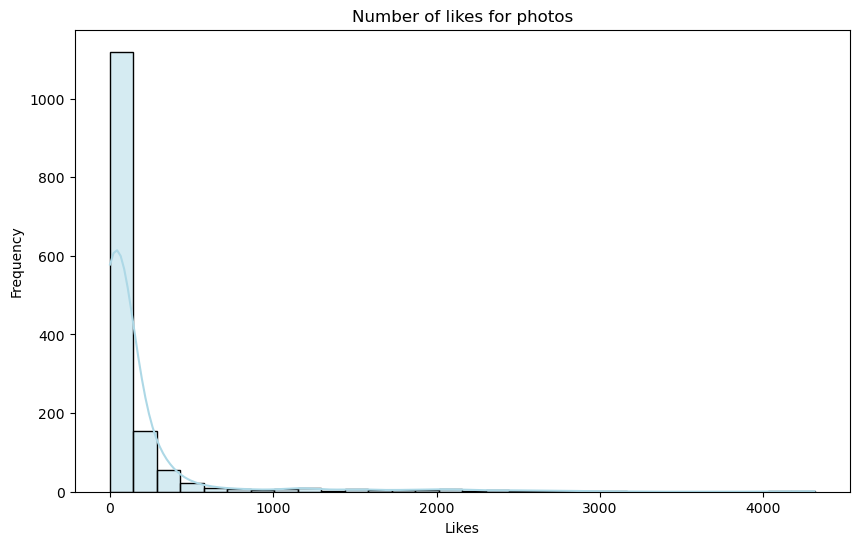

In [78]:
# filter the dataframe
photo_data = facebook_data[facebook_data['status_type'] == 'photo']

# building the histplot
plt.figure(figsize=(10, 6))
sns.histplot(x=photo_data['num_likes'], 
             color='lightblue', 
             kde=True, 
             bins = 30)
# labels and title
plt.title('Number of likes for photos')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()


One-hot encoding status_type variable

In [81]:
# Removing status_id and time_published
facebook_new_df = facebook_data.drop(['status_id', 'time_published'], axis=1)

# Create binary variables for each category in status_type
status_type_encoded = pd.get_dummies(facebook_new_df['status_type'], 
                                     prefix='status')

# Concatenate the new binary variables to the original DataFrame
reactions_df = pd.concat([facebook_new_df, status_type_encoded], 
                         axis=1)

# Remove the original 'status_type' column
reactions_df.drop('status_type', axis=1, inplace=True)

# Display the resulting DataFrame
reactions_df.head()



,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,engagement,status_photo,status_text,status_video
0,0,0,150,0,0,0,0,0,150,True,False,False
1,2,3,202,7,1,0,0,0,215,True,False,False
2,4,0,200,8,1,0,0,0,213,True,False,False
3,100,30,303,23,1,5,0,0,462,False,False,True
4,173,47,132,16,1,0,1,0,370,False,False,True


PCA and Scaling

In [13]:
# removing demographic data
#reactions_df = encoded_df.drop(['status_id', 'time_published'], axis = 1)


# scaling (normalizing) variables before correlation analysis
reactions_scaled = scaler(df = reactions_df)


# checking pre- and post-scaling variance
print(np.var(reactions_df), '\n\n')
print(np.var(reactions_scaled))

num_comments    7.330405e+05
num_shares      1.531511e+04
num_likes       2.182888e+05
num_loves       1.680086e+03
num_wows        7.597826e+01
num_hahas       1.689686e+01
num_sads        3.392409e+00
num_angrys      8.172712e-01
engagement      1.289312e+06
status_photo    2.376961e-01
status_text     6.168369e-02
status_video    2.186821e-01
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
engagement      1.0
status_photo    1.0
status_text     1.0
status_video    1.0
dtype: float64


# Principal Component Analysis

In [15]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
reactions_pca = pca.fit_transform(reactions_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", reactions_scaled.shape)
print("PCA shape     :", reactions_pca.shape)

Original shape: (2362, 12)
PCA shape     : (2362, 12)


# Evaluating PCA Algorithm

In [16]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.372
PC 2: 0.126
PC 3: 0.105
PC 4: 0.083
PC 5: 0.079
PC 6: 0.073
PC 7: 0.066
PC 8: 0.051
PC 9: 0.032
PC 10: 0.011
PC 11: 0.0
PC 12: 0.0


In [19]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

1.0


#### Scree Plot

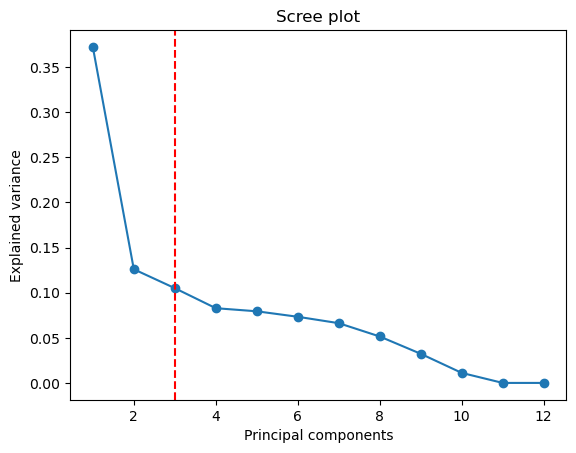

In [42]:
# Plotting the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')

# vertical line
plt.axvline(x=3, color='r', linestyle='--')

# title and labels
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')

# displaying the plot
plt.show()


Examining the scree plot, we can observe that there is a clear elbow or point of inflection on the second component, this suggests that a significant portion of the variability in the data can be explained by the first two principal components, therefore, it is reasonable to consider retaining only the initial two principal components for a meaningful and effective representation of the variability in our data. The other components may have a lesser contribution to the explanation of the total variance.

# Interpreting Principal Components and Latent Traits¶


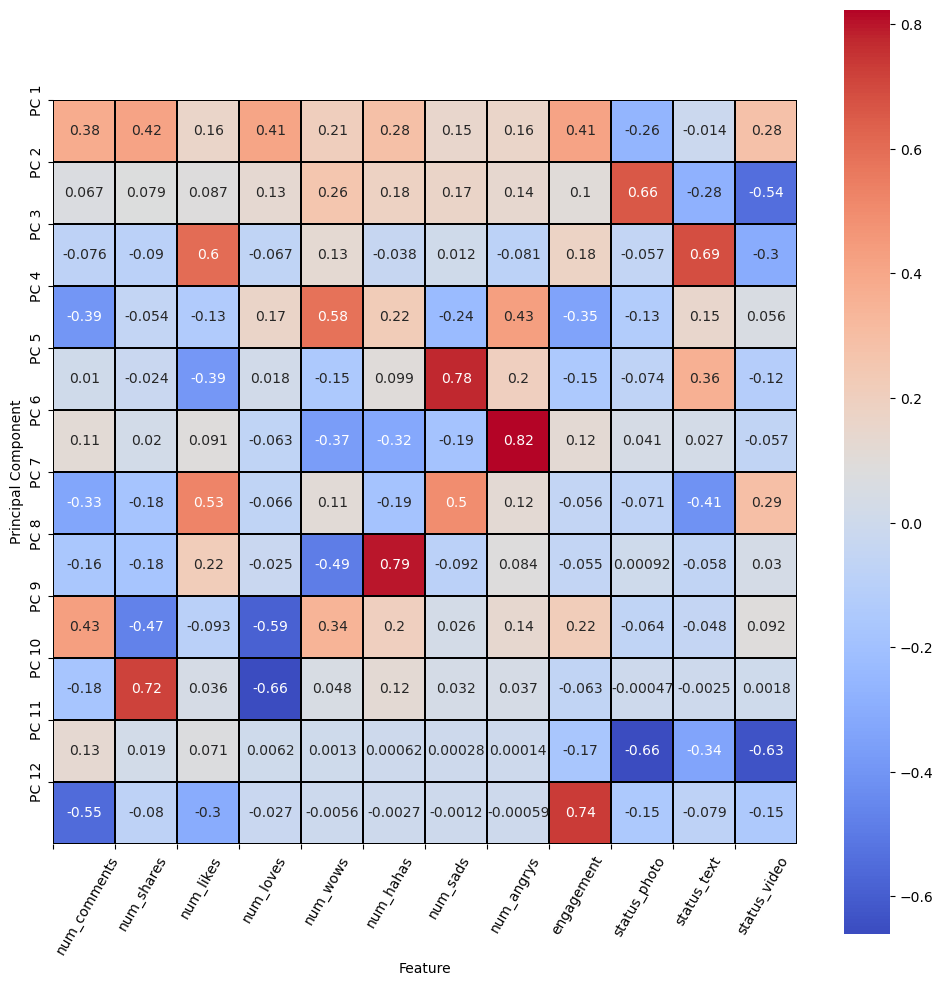

In [36]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7", "PC 8", "PC 9", "PC 10", "PC 11", "PC 12"])

plt.xticks(range(0, 12),
           reactions_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

Analyze the PC factor loadings

In [37]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(reactions_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel(excel_writer = 'reaction_factor_loadings.xlsx',
                            index        = False)

                0     1     2     3     4     5     6     7     8     9     10    11
num_comments  0.38  0.07 -0.08 -0.39  0.01  0.11 -0.33 -0.16  0.43 -0.18  0.13 -0.55
num_shares    0.42  0.08 -0.09 -0.05 -0.02  0.02 -0.18 -0.18 -0.47  0.72  0.02 -0.08
num_likes     0.16  0.09  0.60 -0.13 -0.39  0.09  0.53  0.22 -0.09  0.04  0.07 -0.30
num_loves     0.41  0.13 -0.07  0.17  0.02 -0.06 -0.07 -0.02 -0.59 -0.66  0.01 -0.03
num_wows      0.21  0.26  0.13  0.58 -0.15 -0.37  0.11 -0.49  0.34  0.05  0.00 -0.01
num_hahas     0.28  0.18 -0.04  0.22  0.10 -0.32 -0.19  0.79  0.20  0.12  0.00 -0.00
num_sads      0.15  0.17  0.01 -0.24  0.78 -0.19  0.50 -0.09  0.03  0.03  0.00 -0.00
num_angrys    0.16  0.14 -0.08  0.43  0.20  0.82  0.12  0.08  0.14  0.04  0.00 -0.00
engagement    0.41  0.10  0.18 -0.35 -0.15  0.12 -0.06 -0.06  0.22 -0.06 -0.17  0.74
status_photo -0.26  0.66 -0.06 -0.13 -0.07  0.04 -0.07  0.00 -0.06 -0.00 -0.66 -0.15
status_text  -0.01 -0.28  0.69  0.15  0.36  0.03 -0.41 -0.06 -0.0


The first component is closely related to certain user interactions, the variables that have the most positive impact on this component are num_shares (0.42), engagement (0.41), num_loves (0.41), and num_comments (0.38). On the other hand, status_photo (-0.26) and status_text (-0.01) have negative contributions, indicating that the presence of photos and text may be inversely related to this component, making the videos the predominant type of content for this component.

Component 2 appears to be associated with variables that could represent distinct types or formats of content. For instance, status_photo (0.66) has the most significant positive influence, followed by status_video  (-0.54). This suggests that photo content has a considerable impact on this component, while text and video content has a negative impact, additionally, we see moderate contributions from num_wows (0.26) and num_sads (0.17), which could indicate the presence of emotional reactions to this type of content.

The third component shows a strong positive representation on num_likes (0.60) and status_text(.69), suggesting an association with positive user interactions, such as "likes" in text type content, and also having strong negative representation on video type content (-.30).

The fourth component of the text is significantly linked with emotions of surprise and anger in the main content types. It is characterized by a high num_wows (.58), a high num_angrys (.43), and a negative relationship with the number of comments (-0.39). This may imply that the type of content is unexpected by users and generates negative emotions.

The fifth component is strongly associated with negativity and likes in terms of interactions. It is characterized by a high num_sads (.78), a negative relationship with num_likes (-.39), and a small relationship with the num_angrys (.20). The component has a relationship with video content (.36), which may indicate that the type of text is sensitive or somewhat controversial.

In [38]:
# naming each principal component
factor_loadings_df.columns = ['Sharing positivity',    # + Shares, + Loves, + Comments
                              'Surprising photos',     # + Wows, + Photos
                              'Words and likes',       # after elbow but considered to analyze more data
                              '3',                     # after elbow
                              '4',                     # after elbow
                              '5',                     # after elbow
                              '7',                     # after elbow
                              '8',                     # after elbow
                              '9',                     # after elbow
                              '10',                    # after elbow
                              '11',                    # after elbow
                              '12']                    # after elbow


# checking the result
factor_loadings_df

,Sharing positivity,Surprising photos,Words and likes,3,4,5,7,8,9,10,11,12
num_comments,0.38,0.07,-0.08,-0.39,0.01,0.11,-0.33,-0.16,0.43,-0.18,0.13,-0.55
num_shares,0.42,0.08,-0.09,-0.05,-0.02,0.02,-0.18,-0.18,-0.47,0.72,0.02,-0.08
num_likes,0.16,0.09,0.60,-0.13,-0.39,0.09,0.53,0.22,-0.09,0.04,0.07,-0.30
num_loves,0.41,0.13,-0.07,0.17,0.02,-0.06,-0.07,-0.02,-0.59,-0.66,0.01,-0.03
num_wows,0.21,0.26,0.13,0.58,-0.15,-0.37,0.11,-0.49,0.34,0.05,0.00,-0.01
num_hahas,0.28,0.18,-0.04,0.22,0.10,-0.32,-0.19,0.79,0.20,0.12,0.00,-0.00
num_sads,0.15,0.17,0.01,-0.24,0.78,-0.19,0.50,-0.09,0.03,0.03,0.00,-0.00
num_angrys,0.16,0.14,-0.08,0.43,0.20,0.82,0.12,0.08,0.14,0.04,0.00,-0.00
engagement,0.41,0.10,0.18,-0.35,-0.15,0.12,-0.06,-0.06,0.22,-0.06,-0.17,0.74
status_photo,-0.26,0.66,-0.06,-0.13,-0.07,0.04,-0.07,0.00,-0.06,-0.00,-0.66,-0.15


#### Reaction-Level Personas


In [39]:
# converting into a DataFrame 
reactions_pca = pd.DataFrame(reactions_pca)


# renaming columns
reactions_pca.columns = factor_loadings_df.columns


# checking results
reactions_pca.head()

,Sharing positivity,Surprising photos,Words and likes,3,4,5,7,8,9,10,11,12
0,-1.044923,0.730143,-0.096886,-0.129890,-0.100916,0.022775,-0.111114,0.019658,-0.047414,-0.002074,2.940991e-14,-9.652264e-15
1,-0.899013,0.799891,-0.019231,-0.071269,-0.167517,-0.012595,-0.059945,-0.024617,-0.116541,-0.091063,1.088533e-15,5.423956e-15
2,-0.899706,0.800758,-0.021754,-0.065595,-0.164541,-0.014938,-0.060109,-0.022167,-0.118430,-0.124916,6.898362e-16,1.852408e-14
3,1.004270,-1.368269,-0.486369,0.486538,-0.259161,-0.573503,0.484448,0.972273,0.199951,-0.069040,-1.822908e-15,-1.158714e-15
4,0.665061,-1.544932,-0.674746,0.097570,0.190493,-0.302625,0.753054,-0.152726,0.058882,-0.006780,4.721326e-15,1.265234e-15


In [40]:
# exploring customers in the Healthfood Heroes persona
len(reactions_pca['Sharing positivity'][reactions_pca['Sharing positivity'] > 1.0])

361

# Part VI: Reducing to Relevant Principal Components

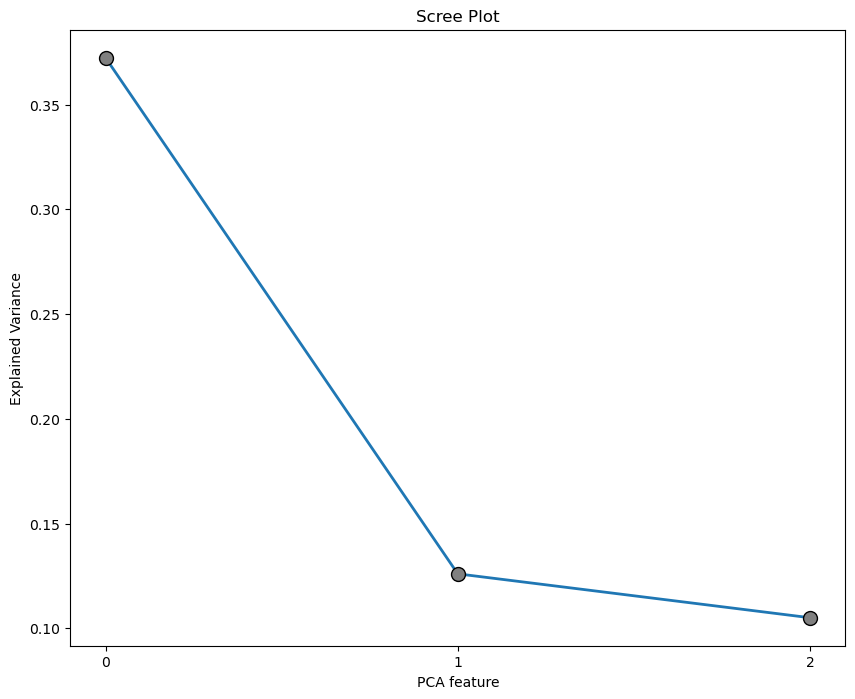

In [41]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 702)


# FITTING and TRANSFORMING the reactions_scaled
reactions_pca_3 = pca_3.fit_transform(reactions_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_3,
           export     = False)

In [44]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(reactions_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(reactions_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(decimals = 2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(decimals = 2)}
""")


MAX Components Factor Loadings
------------------------------
                0     1     2     3     4     5     6     7     8     9     10    11
num_comments  0.38  0.07 -0.08 -0.39  0.01  0.11 -0.33 -0.16  0.43 -0.18  0.13 -0.55
num_shares    0.42  0.08 -0.09 -0.05 -0.02  0.02 -0.18 -0.18 -0.47  0.72  0.02 -0.08
num_likes     0.16  0.09  0.60 -0.13 -0.39  0.09  0.53  0.22 -0.09  0.04  0.07 -0.30
num_loves     0.41  0.13 -0.07  0.17  0.02 -0.06 -0.07 -0.02 -0.59 -0.66  0.01 -0.03
num_wows      0.21  0.26  0.13  0.58 -0.15 -0.37  0.11 -0.49  0.34  0.05  0.00 -0.01
num_hahas     0.28  0.18 -0.04  0.22  0.10 -0.32 -0.19  0.79  0.20  0.12  0.00 -0.00
num_sads      0.15  0.17  0.01 -0.24  0.78 -0.19  0.50 -0.09  0.03  0.03  0.00 -0.00
num_angrys    0.16  0.14 -0.08  0.43  0.20  0.82  0.12  0.08  0.14  0.04  0.00 -0.00
engagement    0.41  0.10  0.18 -0.35 -0.15  0.12 -0.06 -0.06  0.22 -0.06 -0.17  0.74
status_photo -0.26  0.66 -0.06 -0.13 -0.07  0.04 -0.07  0.00 -0.06 -0.00 -0.66 -0.15
st

In [46]:
# naming each principal component
factor_loadings_3.columns = ['Sharing positivity',    # + Shares, + Loves, + Comments
                              'Surprising photos',    # + Wows, + Photos
                            'Words and likes',]       # + Likes, + Text, - Video   


# checking the result
factor_loadings_3.round(decimals = 2)

,Sharing positivity,Surprising photos,Words and likes
num_comments,0.38,0.07,-0.08
num_shares,0.42,0.08,-0.09
num_likes,0.16,0.09,0.60
num_loves,0.41,0.13,-0.07
num_wows,0.21,0.26,0.13
num_hahas,0.28,0.18,-0.04
num_sads,0.15,0.17,0.01
num_angrys,0.16,0.14,-0.08
engagement,0.41,0.10,0.18
status_photo,-0.26,0.66,-0.06


In [47]:
# converting reactions-level data into DataFrame
reactions_pca_3 = pd.DataFrame(reactions_pca_3)


# renaming reactions-level data
reactions_pca_3.columns = list(factor_loadings_3.columns)


# checking factor loadings per reaction
reactions_pca_3.head(n = 5)

,Sharing positivity,Surprising photos,Words and likes
0,-1.044923,0.730143,-0.096886
1,-0.899013,0.799891,-0.019231
2,-0.899706,0.800758,-0.021754
3,1.004270,-1.368269,-0.486369
4,0.665061,-1.544932,-0.674746


#  Clustering

In [48]:
# checking variance amongst clusters
np.var(reactions_pca_3)

Sharing positivity    4.469021
Surprising photos     1.511772
Words and likes       1.260294
dtype: float64

In [49]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = reactions_pca_3)


# checking pre- and post-scaling variance
print(np.var(reactions_pca_3), '\n\n')
print(np.var(pca_rescaled))

Sharing positivity    4.469021
Surprising photos     1.511772
Words and likes       1.260294
dtype: float64 


Sharing positivity    1.0
Surprising photos     1.0
Words and likes       1.0
dtype: float64


# Agglomerative Clustering

In [151]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

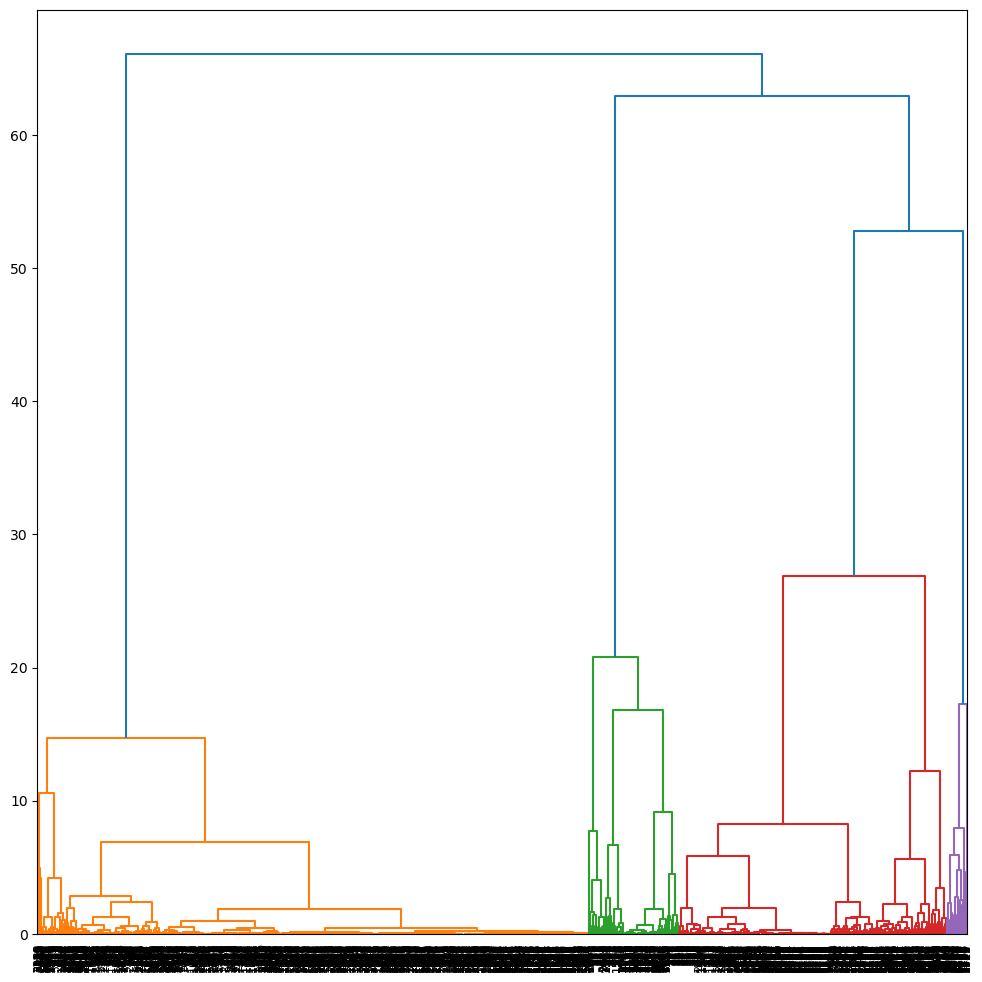

In [50]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 8       )


# rendering the plot
plt.show()

In [67]:
# INSTANTIATING a k-Means object with clusters
reactions_k_pca = KMeans(n_clusters   = 3    ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
reactions_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
reactions_kmeans_pca = pd.DataFrame({'Cluster': reactions_k_pca.labels_})


# checking the results
print(reactions_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    1410
2     738
0     214
Name: count, dtype: int64


We have decided to segment our data into groups that are easily understandable, and for that, we have selected 3 clusters due to the sample size and density of the clusters, if we opt for more clusters, there is a risk of overfitting, which can complicate the interpretation.

In [64]:
# checking which observations belong to each cluster
reactions_kmeans_pca.head(n = 5)

,Cluster
0,1
1,1
2,1
3,2
4,2


In [55]:
# storing cluster centers
centroids_pca = reactions_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['Sharing positivity',
                             'Surprising photos',
                            'Words and likes']


# checking results (clusters = rows, pc = columns)
centroids_pca_df

,Sharing positivity,Surprising photos,Words and likes
0,0.06,-0.80,2.82
1,-0.47,0.63,-0.13
2,0.25,-1.33,-0.59
3,5.04,2.15,0.10
4,1.93,-0.44,-0.62


#### Segment 0: 
This segment could refer to content that emphasizes spreading positivity and optimism. High scores for "Sharing positivity" and "Words and likes" suggest that this type of content tends to generate more interactions and sharing among users. An example of a post in this segment could be a motivational or inspirational post that encourages the community to maintain a positive and constructive attitude in their lives.

#### Segment 1: 
This segment could be characterized by content that features unexpected or surprising photos. Though the level of positivity is low, the high score on "Surprising photos" suggests that these types of posts catch the attention of users due to their surprising or out-of-the-ordinary nature. An example of a post in this segment could be a striking image of a natural phenomenon or an unusual situation that arouses the curiosity of viewers.

#### Segment 2: 
This segment may represent content that focuses on creating interactions through the language and words used in the posts. While the level of positivity is moderate, the negative score on "Surprising photos" suggests that this type of content does not rely heavily on eye-catching images. Rather, it relies more on text to capture users' attention. An example of a post in this segment could be a thought-provoking question or a deep reflection that motivates users to engage in meaningful conversations.

#### Segment 3 : 
This segment appears to represent highly successful content in terms of user interactions and engagement. Very high values in "Sharing positivity" and "Surprising photos" indicate that this type of content generates a lot of interest and engagement among users. An example of a post in this segment could be a viral video that combines elements of positivity and surprise to capture the audience's attention and encourage massive interactions.


#### Segment 4. 
This segment is likely to feature content that revolves around sharing visually stunning or unexpected images. However, it may not have a significant positive element. Although the photos may be visually striking, the low score in "Sharing positivity" suggests that the content may not be as inspiring or motivating as in other segments. For instance, a post in this segment may feature an alluring picture that sparks users' curiosity but does not necessarily invoke happy or exciting feelings.


In [163]:
reactions_pca.head()

,Sharing positivity,Surprising photos,2,3,4,5,7,8,9,10,11,12
0,-1.044923,0.730143,-0.096886,-0.129890,-0.100916,0.022775,-0.111114,0.019658,-0.047414,-0.002074,2.940991e-14,-9.652264e-15
1,-0.899013,0.799891,-0.019231,-0.071269,-0.167517,-0.012595,-0.059945,-0.024617,-0.116541,-0.091063,1.088533e-15,5.423956e-15
2,-0.899706,0.800758,-0.021754,-0.065595,-0.164541,-0.014938,-0.060109,-0.022167,-0.118430,-0.124916,6.898362e-16,1.852408e-14
3,1.004270,-1.368269,-0.486369,0.486538,-0.259161,-0.573503,0.484448,0.972273,0.199951,-0.069040,-1.822908e-15,-1.158714e-15
4,0.665061,-1.544932,-0.674746,0.097570,0.190493,-0.302625,0.753054,-0.152726,0.058882,-0.006780,4.721326e-15,1.265234e-15


## Classification Modeling with Original x-features

In [71]:
# subsetting continuous data
facebook_continuous = reactions_df[ ['num_comments', 'num_likes', 'num_loves',
                               'num_hahas', 'num_sads', 'num_angrys'] ]


# scaling the data
pca_data1 = standard_scaler(df = facebook_continuous)

# INSTANTIATING a PCA object
pca = PCA(n_components = 4,
          random_state = 702)


# preparing factor loadings
reactions_pca1 = pca.fit_transform(pca_data1)


# selecting x- and y-data
x_data = reactions_pca1
y_data = reactions_df['status_photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [72]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.003
Test AUC Score: 0.676



In [73]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 86
False Positives: 144
False Negatives: 8
True Positives : 353



## Classification Modeling with Retained principal components
#### Selected model

In [75]:
# selecting x- and y-data
x_data = reactions_pca_3
y_data = reactions_df['status_photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [76]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.003
Test AUC Score: 0.997



In [77]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 230
False Positives: 0
False Negatives: 2
True Positives : 359



Analyzing our confusion matrix, we can see that we are achieving a high number of true positives. This indicates that our model accurately and effectively identifies posts that are photos. This is crucial for future marketing strategy as it enables us to leverage the power of visual content to engage and attract our audience effectively. Moreover, the fact that we have an insignificant number of false positives demonstrates the high precision of our model in identifying content that is not photographic,  avoiding the presentation of erroneous content to our audience.

Although we have a few false negatives, these represent opportunities to improve and fine-tune our model. However, it is important to note that these errors are minimal compared to our true positives, indicating that we are on the right path. 

## Classification Modeling with Clusters

In [173]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = reactions_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2  3  4
1  0  0  0    1438
0  1  0  0      37
   0  1  0      69
      0  1     583
         0     235
Name: count, dtype: int64

In [176]:
# selecting x- and y-data
x_data = cluster_df
y_data = reactions_df['status_photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)

In [177]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")


Train-Test Gap: 0.004
Test AUC Score: 0.996



In [178]:
# storing cluster centers
centroids_pca = pd.DataFrame(data = reactions_k_pca.cluster_centers_)


# checking cluster centers
centroids_pca.round(decimals = 2)

,0,1
0,1.03,-0.89
1,-0.45,0.64
2,5.34,2.48
3,2.83,0.17
4,0.03,-1.40


In [179]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 230
False Positives: 0
False Negatives: 3
True Positives : 358

